# <center> Taller. Análisis Exploratorio de Datos con Python

<img src="img/utec.png"  width=50% />

### Contenido del Taller
1. Demostración de los métodos principales de Pandas
2. Primer intento de predicción de fuga de clientes

## 1. Demostración de los métodos principales de Pandas

**[Pandas](http://pandas.pydata.org)** es una biblioteca de Python que provee de medios para realizar análisis de datos. Los "Científicos de Datos" suelen trabajar con datos almacenados en formatos de tabla como `.csv`, `.tsv`, o `.xlsx`. Pandas hace muy conveniente cargar, procesar, y analizar tales datos tabulares usando consultas de tipo SQL. En conjunto con `Matplotlib` y `Seaborn`, `Pandas` provee de un rango de oportunidades para el analisis visual de datos tabulares.

Las estructuras de datos principales en `Pandas` con implementadas con las clases **Series** y **DataFrame**. La primera es un array indizado unidimensional de un tipo de datos fijo. El segundo es una estrctura de datos bidimensional - una tabla - donde cada columna contiene datos del mismo tipo. Puedes verlo como un dictionario de instancias de `Series`. Los `DataFrames` son buenos para representar datos reales:las filas corresponden a instancias (ejemplos, observaciones, etc.), y las columnas corresponden a caracteristicas de esas instancias.

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)


Demostraremos los principales métodos de accion analizando unos [datos](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) en el indice de deserción o fuga de clientes de una empresa de telecomunicaciones. Leamos los datos (usando el método `read_csv`), y revisemos las primeras 5 líneas usando el método `head`:


In [2]:
df = pd.read_csv('../../data/telecom_churn.csv')
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

<details>
<summary>Mostrando DataFrames en Jupyter notebooks</summary>
<p>
En Jupyter notebooks, los DataFrames de Pandas se muestran de forma agradable a la vista como en el ejemplo de arriba mientras que `print(df.head())` se muestra en un formato menos agradable.
Por defecto, Pandas muestra 20 columnas y 60 filas, por lo que, si tu DataFrame es más grande, usa la función `set_option`como se muestra en el siguiente ejemplo:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```
</p>
</details>

Recordemos que cada fila corresponde a un cliente, una **instancia**, y las columnas son **características** de esta instancia.

Veamos la dimensionalidad de los datos, los nombres de las características y los tipos de características.

In [3]:
print(df.shape)

(3333, 20)


Del resultado, vemos que la tabla tiene 3333 filas y 20 columnas.

Ahora mostremos los nombres de las columnas usando `columns`:

In [4]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


Podemos usar el método `info()` para mostrar información general acerca del dataframe:

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


`bool`, `int64`, `float64` y `object` son los tipos de datos de nuestras características. Vemos que una característica es lógica (`bool`), 3 caracterísicas son del tipo `object`, y 16 características son numericas. Con este mismo método, podemos ver facilmente si hay algun valor perdido. Aqui, no hay ninguno porque cada columna tiene 3333 observaciones, el mismo número de filas que antes con `shape`.

Podemos **cambiar el tipo de columna** con el método `astype`. Apliquemos este método a la característica `Churn` para convertirla en `int64`:


In [6]:
df['Churn'] = df['Churn'].astype('int64')


El método `describe` muestra estadísticas básicas de cada característica numérica (tipos `int64` y `float64`): número de valores no perdidos, media, desviación estándar, rango, mediana, y cuartiles 0.25 y 0.75.

In [1]:
df.describe()

NameError: name 'df' is not defined

Para ver estadísticas de característica no numéricas, se tiene que inicar el tipo de dato de interés de manera explícita en el parámetro `include`.

In [8]:
df.describe(include=['object', 'bool'])

State International plan Voice mail plan
count   3333               3333            3333
unique    51                  2               2
top       WV                 No              No
freq     106               3010            2411

Para características categóricas (tipo `object`) y booleanas (tipo `bool`) podemos usar el método `value_counts`. Veamos la distribución de `Churn`:

In [9]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

2850 usuarios de 3333 son *loyal*; si valor de `Churn` es 0. Para calcular fracciones, hay que pasar `normalize=True` a la función `value_counts`.

In [10]:
df['Churn'].value_counts(normalize=True)

0    0.86
1    0.14
Name: Churn, dtype: float64


### Ordenamiento

Un `DataFrame` puede ser ordenado por el valor de una de las variables (i.e columnas). Por ejemplo, podemos ordenar por *Total day charge* (usa `ascending=False` para ordenar en forma descendente):


In [11]:
df.sort_values(by='Total day charge', ascending=False).head()

State  Account length  Area code International plan Voice mail plan  \
365     CO             154        415                 No              No   
985     NY              64        415                Yes              No   
2594    OH             115        510                Yes              No   
156     OH              83        415                 No              No   
605     MO             112        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
365                       0              350.8               75   
985                       0              346.8               55   
2594                      0              345.3               81   
156                       0              337.4              120   
605                       0              335.5               77   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
365              59.64              216.5               94             18.40   
985              58.96              249.5               79             21.21   
2594             58.70              203.4              106             17.29   
156              57.36              227.4              116             19.33   
605              57.04              212.5              109             18.06   

      Total night minutes  Total night calls  Total night charge  \
365                 253.9                100               11.43   
985                 275.4                102               12.39   
2594                217.5                107                9.79   
156                 153.9                114                6.93   
605                 265.0                132               11.93   

      Total intl minutes  Total intl calls  Total intl charge  \
365                 10.1                 9               2.73   
985                 13.3                 9               3.59   
2594                11.8                 8               3.19   
156                 15.8                 7               4.27   
605                 12.7                 8               3.43   

      Customer service calls  Churn  
365                        1      1  
985                        1      1  
2594                       1      1  
156                        0      1  
605                        2      1

También podemos ordenar por múltiple columnas:

In [12]:
df.sort_values(by=['Churn', 'Total day charge'], ascending=[True, False]).head()

State  Account length  Area code International plan Voice mail plan  \
688     MN              13        510                 No             Yes   
2259    NC             210        415                 No             Yes   
534     LA              67        510                 No              No   
575     SD             114        415                 No             Yes   
2858    AL             141        510                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
688                      21              315.6              105   
2259                     31              313.8               87   
534                       0              310.4               97   
575                      36              309.9               90   
2858                     28              308.0              123   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
688              53.65              208.9               71             17.76   
2259             53.35              147.7              103             12.55   
534              52.77               66.5              123              5.65   
575              52.68              200.3               89             17.03   
2858             52.36              247.8              128             21.06   

      Total night minutes  Total night calls  Total night charge  \
688                 260.1                123               11.70   
2259                192.7                 97                8.67   
534                 246.5                 99               11.09   
575                 183.5                105                8.26   
2858                152.9                103                6.88   

      Total intl minutes  Total intl calls  Total intl charge  \
688                 12.1                 3               3.27   
2259                10.1                 7               2.73   
534                  9.2                10               2.48   
575                 14.2                 2               3.83   
2858                 7.4                 3               2.00   

      Customer service calls  Churn  
688                        3      0  
2259                       3      0  
534                        4      0  
575                        1      0  
2858                       1      0


### Indizar y consultar datos

Un `DataFrame` puede ser indizado de algunas formas. 

Para obtener una sola columna, puedes usar la construcción `DataFrame['Name']`. Usemos esto para responder una pregunta sobre esa única columna: **¿Cuál es la proporción de usuarios fugados en nuestro dataframe?**



In [13]:
df['Churn'].mean()

0.14491449144914492


14.5% is bastante malo para una compañia de telecomunicaciones; un indicador de deserción de ese tipo puede llevar a una compañía a una bancarota.

La **Indización Booleana** con una columna es también conveniente. La sintaxis es `df[P(df['Name'])]`, donde `P` es alguna condición lógica que se evalúa para cada elemento de la columna `Name`. El resultado de esta indización es el `DataFrame` que consiste en solo las filas que satisfacen la condición `P`en la columna `Name`. 

Usemos esto para responder la pregunta:

**¿Cuales son los promedios de las características numéericas para usuarios en fuga?**


In [14]:
df[df['Churn'] == 1].mean()

Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

**¿Cuanto tiempo (en promedio) los usuarios en fuga gastan en sus llamadas durante el día?**

In [15]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814


**¿Cuál es la maxima cantidad de llamadas internacionales entre usuarios leales (`Churn == 0`) que no tienen un plan internacional?**


In [16]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.9


Los DataFrames pueden ser indizados por nombre de columna (label) o nombre de fila (index) o por el numero de serie de una fila. El método `loc` se usa para **indizar por nombre**, mientras que `iloc()` se usa para **indizar por número**.

En el primer caso abajo decimos que *"dados los valores de las filas con indices desde 0 al 5 (inclusivo) y columnas etiquetadas desde State a Area code (inclusivo)"* . En el segundo caso, decimos *"dados los valores de las cinco primeras filas en las tres primeras columnas"*


In [17]:
df.loc[0:5, 'State':'Area code']

State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415
5    AL             118        510

In [18]:
df.iloc[0:5, 0:3]

State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415

Si necesitamos la primera o la última linea del dataframe, podemos usar la contrucción `df[:1]` o `df[-1:]`:

In [19]:
df[-1:]

State  Account length  Area code International plan Voice mail plan  \
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3332             39.85              265.9               82              22.6   

      Total night minutes  Total night calls  Total night charge  \
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
3332                13.7                 4                3.7   

      Customer service calls  Churn  
3332                       0      0


### Aplicando Funciones a Celdas, Columnas y Filas

**Para aplicar funciones a cada dolumna, usa `apply()`:**


In [20]:
df.apply(np.max) 

State                          WY
Account length                243
Area code                     510
International plan            Yes
Voice mail plan               Yes
Number vmail messages          51
Total day minutes         3.5e+02
Total day calls               165
Total day charge               60
Total eve minutes         3.6e+02
Total eve calls               170
Total eve charge               31
Total night minutes         4e+02
Total night calls             175
Total night charge             18
Total intl minutes             20
Total intl calls               20
Total intl charge             5.4
Customer service calls          9
Churn                           1
dtype: object

El método `apply` puede ser usado para aplicar una función a cada fila. Para hacer esto, especifica `axis=1`. Las funciones Lambda son muy convenientes en ese tipo de escenarios. Por ejemplo, si queremos seleccionar todos los estados que inician con 'W', podemos hacerlo de la siguiente forma:

In [21]:
df[df['State'].apply(lambda state: state[0] == 'W')].head()

State  Account length  Area code International plan Voice mail plan  \
9     WV             141        415                Yes             Yes   
26    WY              57        408                 No             Yes   
44    WI              64        510                 No              No   
49    WY              97        415                 No             Yes   
54    WY              87        415                 No              No   

    Number vmail messages  Total day minutes  Total day calls  \
9                      37              258.6               84   
26                     39              213.0              115   
44                      0              154.0               67   
49                     24              133.2              135   
54                      0              151.0               83   

    Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
9              43.96              222.0              111             18.87   
26             36.21              191.1              112             16.24   
44             26.18              225.8              118             19.19   
49             22.64              217.2               58             18.46   
54             25.67              219.7              116             18.67   

    Total night minutes  Total night calls  Total night charge  \
9                 326.4                 97               14.69   
26                182.7                115                8.22   
44                265.3                 86               11.94   
49                 70.6                 79                3.18   
54                203.9                127                9.18   

    Total intl minutes  Total intl calls  Total intl charge  \
9                 11.2                 5               3.02   
26                 9.5                 3               2.57   
44                 3.5                 3               0.95   
49                11.0                 3               2.97   
54                 9.7                 3               2.62   

    Customer service calls  Churn  
9                        0      0  
26                       0      0  
44                       1      0  
49                       1      0  
54                       5      1

El método `map` puede ser usado para **reemplazar valores en una columna** pasando un diccionaro de la forma `{old_value: new_value}` como su argumento:

In [22]:
d = {'No' : False, 'Yes' : True}
df['International plan'] = df['International plan'].map(d)
df.head()

State  Account length  Area code  International plan Voice mail plan  \
0    KS             128        415               False             Yes   
1    OH             107        415               False             Yes   
2    NJ             137        415               False              No   
3    OH              84        408                True              No   
4    OK              75        415                True              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

Lo mismo puede ser realizado con el método `replace`. 

<details>
<summary>Diferencia en tratar valores que están ausentes en el diccionario de mapeo</summary>
<p>
hay una ligera diferencia. El método `replace` no hace nada con valores que no encuentra en el diccionario de mapeo, mientras que `map` los cambiará a NaNs. 

```python
a_series = pd.Series(['a', 'b', 'c'])
a_series.replace({'a': 1, 'b': 1})     # 1, 2, c
a_series.map({'a': 1, 'b': 2})     # 1, 2, NaN
```
</p>
</details>



In [23]:
df = df.replace({'Voice mail plan': d})
df.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415               False             True   
1    OH             107        415               False             True   
2    NJ             137        415               False            False   
3    OH              84        408                True            False   
4    OK              75        415                True            False   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0


### Agrupamiento

En general, los datos de agrupamiento en Pandas funciona de la siguiente manera:



```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. Primero, el método `groupby` divide la `grouping_columns` por sus valores. Ellos se convierten en un nuevo índice en el dataframe resultante.
2. Luego, se eligen las columnas de interés (`columns_to_show`). Si `columns_to_show` no esta incluida, todas las clausulas no groupby serán incluidas.
3. Finalmente, una o varias funciones son aplicadas a los grupos obtenidos por columna seleccionada.

Aqui hay un ejemplo donde agrupamos los datos de acuerdo a los valores de la variable `Churn`y muestra estadísticas de 3 columnas en cada grupo:

In [24]:
columns_to_show = ['Total day minutes', 
                   'Total eve minutes', 
                   'Total night minutes']

df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

hagamos lo mismo, pero de forma diferente pasando una lista de funciones a `agg()`:

In [25]:
columns_to_show = ['Total day minutes', 
                   'Total eve minutes', 
                   'Total night minutes']

df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                    Total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
        amax                mean    std  amin   amax  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9


### Tablas de resumen

Supongamos que queremos ver como las observaciones en nuestros datos se distribuyen en el contexto de dos variables, `Churn` e `International plan`. Para hacerlo, podemos construir una **Tabla de Contingencia** usaando el método `crosstab`:



In [26]:
pd.crosstab(df['Churn'], df['International plan'])

International plan  False  True 
Churn                           
0                    2664    186
1                     346    137

In [27]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Voice mail plan  False  True 
Churn                        
0                 0.60   0.25
1                 0.12   0.02

Podemos ver que la mayoria de los usuarios son leales y no usan servicios adicionales (International Plan/Voice mail).

Esto puede hacerles recordar un poco a las **tablas dinámicas** a quienes esten familiarizados con Excel. Y, por supuesto, las tablas dinámicas estan implementadas en Pandas: el método `pivot_table` toma los siguientes parámetros:

* `values` – una lista de variables sobre las cuales se quieren calcular estadísticas,
* `index` – una lista de variables por las cuales se va a agrupar los datos,
* `aggfunc` – qué estadísticas necesitamos calcular para los grupos, por ejemplo. suma, media, maximo, minimo, o alguno similar.

Veamos el número promedio de llamadas de dia, tarde y noche por area code:

In [28]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
               ['Area code'], aggfunc='mean')

Total day calls  Total eve calls  Total night calls
Area code                                                     
408                 100.50            99.79              99.04
415                 100.58           100.50             100.40
510                 100.10            99.67             100.60


### Transformación de DataFrames

Como muchas otras cosas en Pandas, agregar columnas a un DataFrame es posible de varias formas.

Por ejemplo, si queremos calcular el número total de llamadas para todos los usuarios, creemos la Serie `total_calls` y pasarla al DataFrame:



In [29]:
total_calls = df['Total day calls'] + df['Total eve calls'] + \
              df['Total night calls'] + df['Total intl calls']
df.insert(loc=len(df.columns), column='Total calls', value=total_calls) 
# el parámetro loc es el numero de columnas despues de la que se inserta la Serie
# lo establecemos como len(df.columns) para ponerlo al final del dataframe
df.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415               False             True   
1    OH             107        415               False             True   
2    NJ             137        415               False            False   
3    OH              84        408                True            False   
4    OK              75        415                True            False   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  ...  Total eve charge  \
0             45.07              197.4  ...             16.78   
1             27.47              195.5  ...             16.62   
2             41.38              121.2  ...             10.30   
3             50.90               61.9  ...              5.26   
4             28.34              148.3  ...             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  Total calls  
0                       1      0          303  
1                       1      0          332  
2                       0      0          333  
3                       2      0          255  
4                       3      0          359  

[5 rows x 21 columns]

Es posible agregar una columna mas facilmente sin crear una instancia de Serie intermedia:

In [30]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + \
                     df['Total night charge'] + df['Total intl charge']
df.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415               False             True   
1    OH             107        415               False             True   
2    NJ             137        415               False            False   
3    OH              84        408                True            False   
4    OK              75        415                True            False   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  ...  Total night minutes  \
0             45.07              197.4  ...                244.7   
1             27.47              195.5  ...                254.4   
2             41.38              121.2  ...                162.6   
3             50.90               61.9  ...                196.9   
4             28.34              148.3  ...                186.9   

   Total night calls  Total night charge  Total intl minutes  \
0                 91               11.01                10.0   
1                103               11.45                13.7   
2                104                7.32                12.2   
3                 89                8.86                 6.6   
4                121                8.41                10.1   

   Total intl calls  Total intl charge  Customer service calls  Churn  \
0                 3               2.70                       1      0   
1                 3               3.70                       1      0   
2                 5               3.29                       0      0   
3                 7               1.78                       2      0   
4                 3               2.73                       3      0   

   Total calls  Total charge  
0          303         75.56  
1          332         59.24  
2          333         62.29  
3          255         66.80  
4          359         52.09  

[5 rows x 22 columns]

Para borrar columnas o filas, usa el método `drop`, pasando los indices requeridos y el parámetro `axis` (`1` si deseas eliminar columnas, y nada o `0` si quieres eliminar filas). El argumento `inplace` dice si se va a cambiar el DataFrame original. Con `inplace=False`, el método `drop` no cambia el DataFrame existente y devuelve uno nuevo sin las filas o columnas eliminadas. con `inplace=True`, altera el DataFrame.

In [31]:
# nos deshacemos de las columnas creadas
df.drop(['Total charge', 'Total calls'], axis=1, inplace=True) 
# y asi es como puedes eliminar filas
df.drop([1, 2]).head() 

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415               False             True   
3    OH              84        408                True            False   
4    OK              75        415                True            False   
5    AL             118        510                True            False   
6    MA             121        510               False             True   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
3                      0              299.4               71   
4                      0              166.7              113   
5                      0              223.4               98   
6                     24              218.2               88   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   
5             37.98              220.6              101             18.75   
6             37.09              348.5              108             29.62   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   

   Customer service calls  Churn  
0                       1      0  
3                       2      0  
4                       3      0  
5                       0      0  
6                       3      0

## 2. Primer intento de predecir la fuga de clientes de telecomunicaciones

Veamos como se relacionan el Índice de Fuga con la característica de *International plan*. Haremos esto mediante el uso de la tabla de contingencia `crosstab` y tambipen mediante un análisis visual con `Seaborn`.


In [32]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan  False  True   All
Churn                                
0                    2664   186  2850
1                     346   137   483
All                  3010   323  3333

In [33]:
# algunos imports para configurar el ploteo
import matplotlib.pyplot as plt
# conda install seaborn 
import seaborn as sns
# importar comfiguración de visualizaciones agradables
sns.set()
# Gráficos en el formato de Retina son mas legibles
%config InlineBackend.figure_format = 'retina'

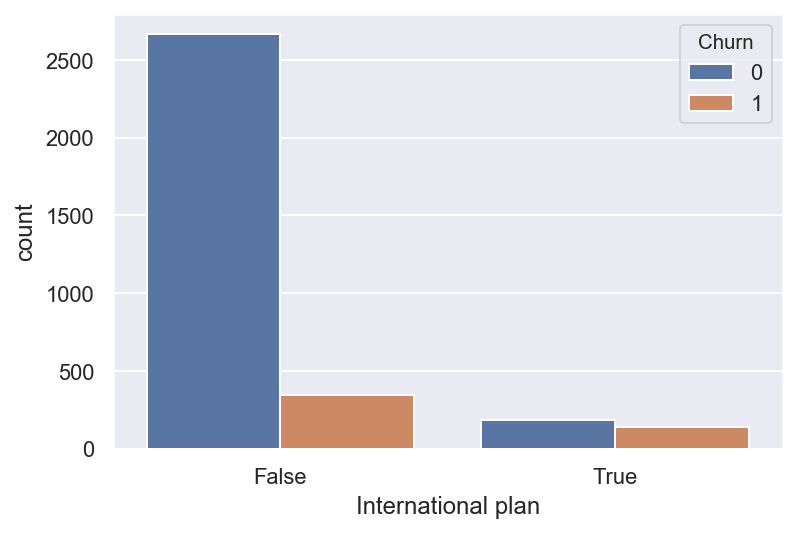

In [34]:
sns.countplot(x='International plan', hue='Churn', data=df);


Vemos que, con *International Plan*, el índice de fuga es mucho mayor, la cual es una observación interesante. De repente los altos y mal administrados gastos en llamadas internacionales generan conflicto y llevan a la insatisfacción entre los clientes de la empresa de telecomunicaciones.

Ahora, veamos otra característica importante – *Customer service calls*. Tambien hagamos uns tabla de resumen y un gráfico.

In [35]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls    0     1    2    3    4   5   6  7  8  9   All
Churn                                                                  
0                       605  1059  672  385   90  26   8  4  1  0  2850
1                        92   122   87   44   76  40  14  5  1  2   483
All                     697  1181  759  429  166  66  22  9  2  2  3333

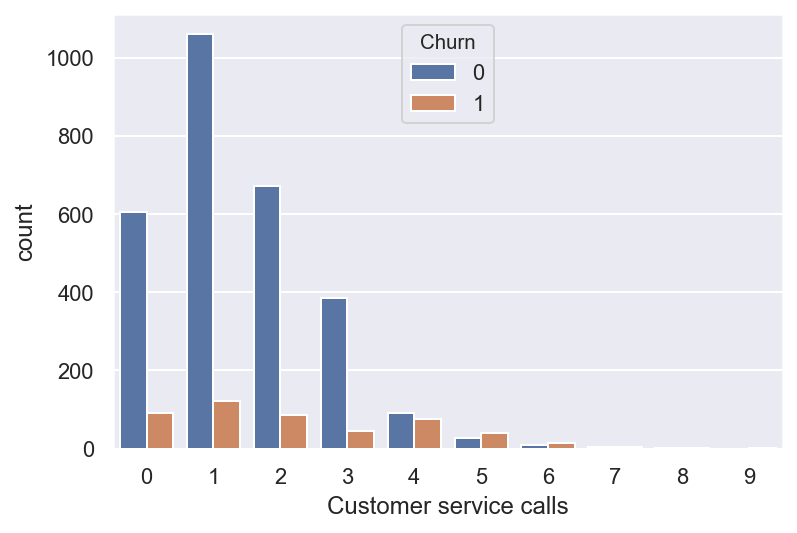

In [36]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

A pesar de que no es obvio desde la tabla de resumen, es facil ver del gráfico que el índice de fuga se incrementa a partir de 4 llamadas de servicio a más.

Ahora vamos a agregar una característica binaria a nuestro DataFrame – `Customer service calls > 3`. Y nuevamente, veamos como se relaciona con la fuga. 

In [37]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn                  0    1   All
Many_service_calls                 
0                   2721  345  3066
1                    129  138   267
All                 2850  483  3333

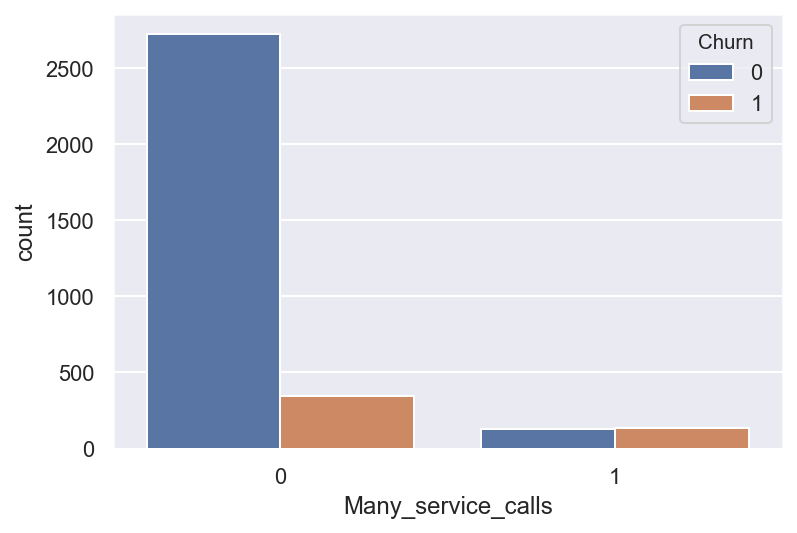

In [38]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df);


Construyamos otra tabla de contingenica que relaciona el *Churn* tanto con *International plan* y el recien creado *Many_service_calls*.



In [39]:
pd.crosstab(df['Many_service_calls'] & df['International plan'] , df['Churn'])

Churn     0    1
row_0           
False  2841  464
True      9   19

Asi, predecir que un cliente no es leal (*Churn*=1) en el caso cuando el número de llamadas al centro de servicio es mayor a 3 y el *International Plan* se agrega (y predecir *Churn*=0 de otro modo), podriamos esperar una precision de 85.8% (nos equivocamos solo solo 464 + 9 veces). Este número, 85.8%, que obtenemos mediante este razonamiento simple sirve como un buen punto de inicio (*baseline*) para los modelos de machine learning que construiremos.